# AutoTrader (AT) Car Sales Prediction

**Problem Statement**
AutoTrader (AT) machine learning engineers and data scientists in the implementation of the price indicator feature in AT’s website.Our main task is to produce a regression model for predicting the selling price given the characteristics of the cars in the historical data given. 

**Business Goal**
We are required to model the price of cars with the available independents variables. It will be use by the management to understand how exactly the prices varry with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels

## Dataset Description
CSV file - 402,005 rows x 12 columns (including price column as Target Attribute)

**Attributes**
* public_reference	
* mileage	
* reg_code	
* standard_colour	
* standard_make	
* standard_model	
* vehicle_condition	
* year_of_registration	
* price	
* body_type
* crossover_car_and_van	
* fuel_type

In [1]:
import warnings
import math
import random

# **DATA PROCESSING**
import numpy as np
import pandas as pd

# **DATA ANAYLSIS**
import matplotlib.pyplot as plt
import seaborn as sns




warnings.filterwarnings('ignore')
%matplotlib inline

Let's start with the following steps:
1. Importing data using the pandas library
2. Understanding the structure of the data

In [2]:
# load dataset
df = pd.read_csv('data/adverts.xls')
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [3]:
# check shape
df.shape

(402005, 12)

In [4]:
# check unique values of car colors
df['standard_colour'].unique()

array(['Grey', 'Blue', 'Brown', 'Red', 'Bronze', 'Black', 'White',
       'Silver', nan, 'Purple', 'Green', 'Orange', 'Yellow', 'Turquoise',
       'Gold', 'Multicolour', 'Beige', 'Burgundy', 'Pink', 'Maroon',
       'Magenta', 'Navy', 'Indigo'], dtype=object)

In [5]:
# check unique values of car standard make
df['standard_make'].unique()

array(['Volvo', 'Jaguar', 'SKODA', 'Vauxhall', 'Land Rover', 'Audi',
       'Mercedes-Benz', 'Volkswagen', 'Peugeot', 'SEAT', 'MINI', 'BMW',
       'Nissan', 'Mitsubishi', 'Ferrari', 'Citroen', 'Toyota', 'Kia',
       'Renault', 'Fiat', 'Honda', 'Bentley', 'DS AUTOMOBILES', 'Hyundai',
       'Aston Martin', 'McLaren', 'Smart', 'Alfa Romeo', 'Porsche',
       'Abarth', 'Mazda', 'Suzuki', 'MG', 'Dacia', 'Subaru', 'SsangYong',
       'Maserati', 'Saab', 'Rolls-Royce', 'Lexus', 'Jeep', 'Panther',
       'Chevrolet', 'Lamborghini', 'Daihatsu', 'Dodge', 'Isuzu', 'Lotus',
       'Tesla', 'TVR', 'GMC', 'Rover', 'Cadillac', 'Infiniti', 'Alpine',
       'Chrysler', 'Triumph', 'Morgan', 'Dax',
       'London Taxis International', 'Daimler', 'CUPRA', 'Perodua',
       'Lincoln', 'Bugatti', 'Great Wall', 'Replica', 'Opel', 'AC',
       'Proton', 'Lancia', 'Austin', 'Morris', 'Westfield', 'Maybach',
       'Corvette', 'Tiger', 'LEVC', 'Iveco', 'Caterham', 'Hummer',
       'Carbodies', 'Jensen', 'Int

In [6]:
# check unique values of car standard model
df['standard_model'].unique()

array(['XC90', 'XF', 'Yeti', ..., 'Sera', 'Pininfarina', '480'],
      dtype=object)

In [7]:
df['vehicle_condition'].unique()

array(['NEW', 'USED'], dtype=object)

In [8]:
df['year_of_registration'].unique()

array([  nan, 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003., 2006., 2020., 2005.,
       2000., 2002., 2007., 2004., 1991., 2001., 1986., 1998., 1990.,
       1993., 1987., 1994., 1999., 1970., 1988., 1995., 1997., 1969.,
       1992., 1989., 1996., 1976., 1983., 1980., 1973., 1962., 1967.,
       1972., 1982., 1968., 1979., 1964., 1933., 1981., 1985., 1978.,
       1971., 1974., 1966., 1977., 1961., 1965., 1007., 1957., 1515.,
       1963., 1063., 1954., 1975., 1955., 1009., 1016., 1960., 1956.,
       1959., 1909., 1934., 1958., 1010., 1950., 1008., 1018.,  999.,
       1017., 1952., 1006., 1015.])

**What we found out**<br>
The dataset contains cars from the year 999 - 2020. It is obvious that a date appear as '999' instead of '1999'

In [9]:
# return dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


## Step 2: Data Cleaning

In [10]:
# replace the date 999 to 1999
def change_date(year_of_reg):
    if year_of_reg == 999:
        year_of_reg = 1999
    return year_of_reg

df['year_of_registration'] = df['year_of_registration'].apply(change_date)

In [11]:
missing_values = {
    'columns': np.array(df.columns),
    'no missing': df.isnull().sum().values,
    '% missing': (df.isnull().sum().values / len(df)) * 100
}

missing_df = pd.DataFrame(missing_values)
missing_df

,columns,no missing,% missing
0,public_reference,0,0.000000
1,mileage,127,0.031592
2,reg_code,31857,7.924528
3,standard_colour,5378,1.337794
4,standard_make,0,0.000000
5,standard_model,0,0.000000
6,vehicle_condition,0,0.000000
7,year_of_registration,33311,8.286215
8,price,0,0.000000
9,body_type,837,0.208206


**What we found out** <br>
There are missing values in some of the columns like: mileage (0.03%), reg_code (7.92%), standard_color (1.34%),
year_of_registration (8.28%), body_type (0.20%) and fuel_type (0.12%)

## Dealing with the missing values

In [12]:
# mileage - relace missing values with average
df['mileage'].fillna(np.round(df['mileage'].mean()), inplace=True)

In [13]:
# standard color - relace missing values with mode
df['standard_colour'].fillna(df['standard_colour'].mode()[0], inplace=True)

In [14]:
# body type - relace missing values with mode
df['body_type'].fillna(df['body_type'].mode()[0], inplace=True)

In [15]:
# fuel type - relace missing values with mode
df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)

In [16]:
# year_of_registration - drop rows with missing values
df.dropna(inplace=True)

In [17]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368407 entries, 1 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       368407 non-null  int64  
 1   mileage                368407 non-null  float64
 2   reg_code               368407 non-null  object 
 3   standard_colour        368407 non-null  object 
 4   standard_make          368407 non-null  object 
 5   standard_model         368407 non-null  object 
 6   vehicle_condition      368407 non-null  object 
 7   year_of_registration   368407 non-null  float64
 8   price                  368407 non-null  int64  
 9   body_type              368407 non-null  object 
 10  crossover_car_and_van  368407 non-null  bool   
 11  fuel_type              368407 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [18]:
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
5,202009304412074,16000.0,17,Blue,Audi,S5,USED,2017.0,29000,Convertible,False,Petrol


## Step 3: Feature Engineering


In [19]:
# set dataframe index
df.set_index('public_reference', inplace=True)

In [20]:
# calculate car age: the numerical difference between the curent calendar year and the vehicle model year
df['car_age'] = 2023 - df['year_of_registration']
df['car_age'] = df['car_age'].astype(int)

In [21]:
# calculate mile per year
df["mile_per_yr"] = np.where(df["car_age"] == 0, 0, df["mileage"] / df["car_age"])

In [22]:
# group the mile
def mile_group(mile):
        if mile == 0:
            return "No Mileage"
        elif mile < 7052:
            return "Low Mileage"
        elif mile > 7052:
            return "High Mileage"
        else:
            return "Moderate Mileage"

In [23]:
df["mile_yr_group"] = df["mile_per_yr"].apply(mile_group)

In [24]:
df.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,car_age,mile_per_yr,mile_yr_group
public_reference,,,,,,,,,,,,,,
202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel,12,9019.166667,High Mileage
202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol,6,1300.000000,Low Mileage
202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel,7,6428.571429,Low Mileage
202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel,8,8000.000000,High Mileage
202009304412074,16000.0,17,Blue,Audi,S5,USED,2017.0,29000,Convertible,False,Petrol,6,2666.666667,Low Mileage


**Conclusion with the Data Cleaning Process**

## Step 4: Exploratory Data Analysis

In [25]:
df.describe()

,mileage,year_of_registration,price,car_age,mile_per_yr
count,368407.000000,368407.000000,3.684070e+05,368407.000000,368407.000000
mean,40968.107289,2015.024185,1.574816e+04,7.975815,4696.608818
std,34422.865974,7.388444,2.447754e+04,7.388444,3024.793459
min,0.000000,1006.000000,1.200000e+02,3.000000,0.000000
25%,14500.000000,2013.000000,6.999000e+03,5.000000,2555.250000
50%,31944.000000,2016.000000,1.180000e+04,7.000000,4323.125000
75%,60000.000000,2018.000000,1.849500e+04,10.000000,6333.333333
max,999999.000000,2020.000000,3.799995e+06,1017.000000,157614.400000


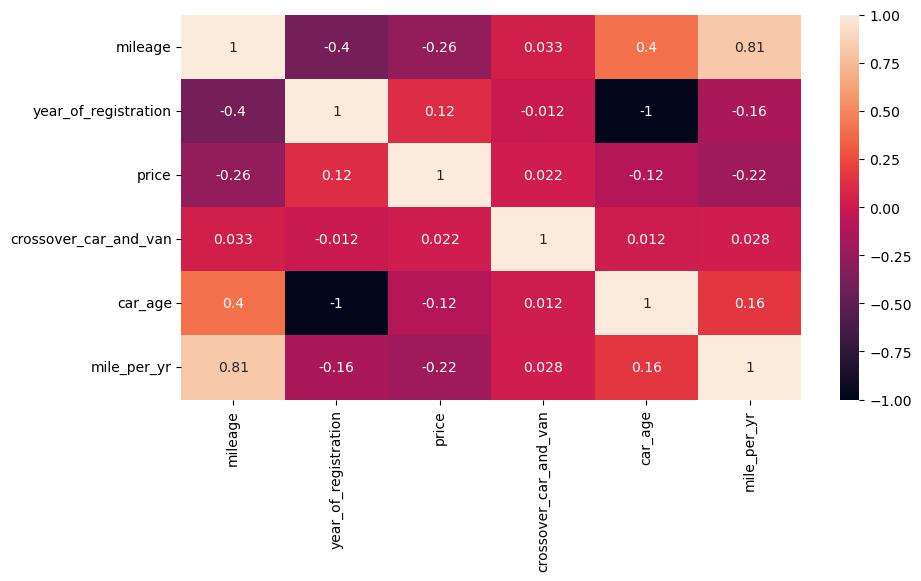

In [26]:
plt.rcParams['figure.figsize'] = (10,5)

corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)
plt.show()

<Figure size 1000x500 with 0 Axes>

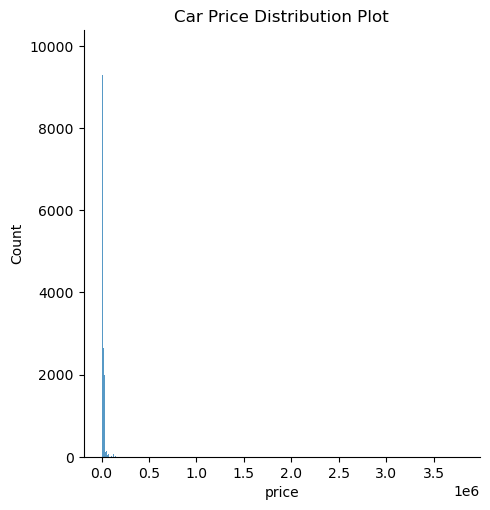

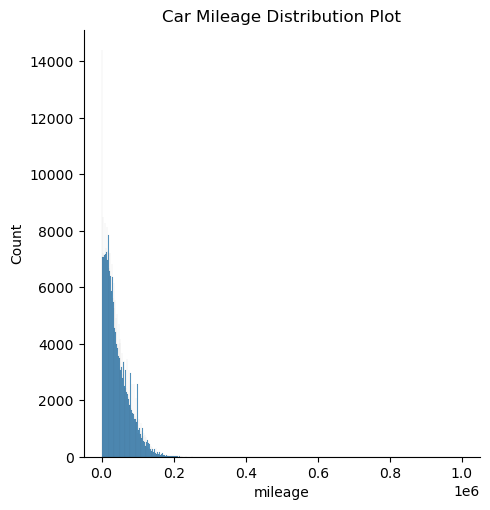

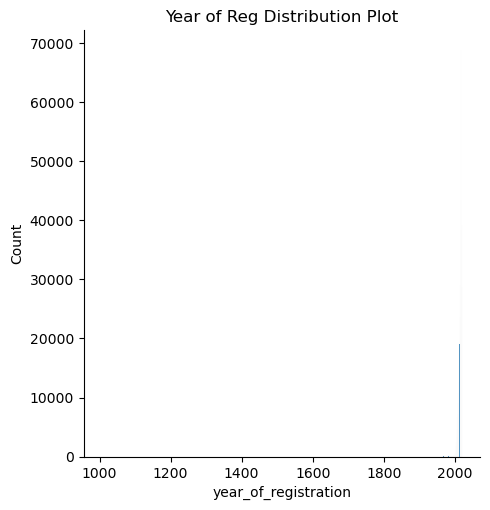

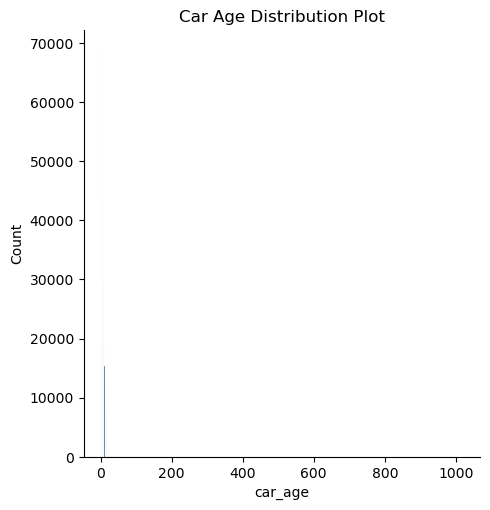

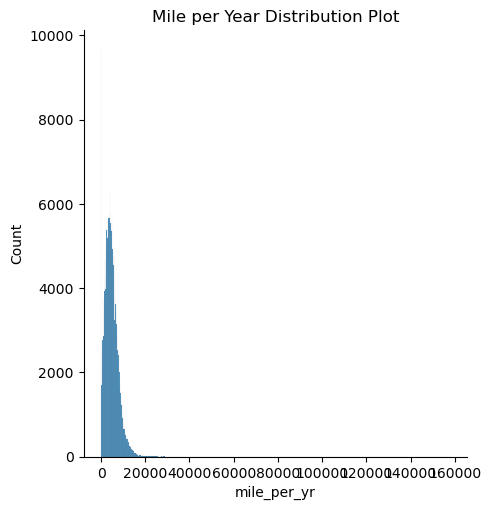

In [27]:
# Exploring the probability Distribution Functions before handling outliers

plt.figure(figsize=(10,5))

plt.subplot=(1,3,1)
sns.displot(df['price'])
plt.title(f"Car Price Distribution Plot")
plt.show()

plt.subplot=(1,3,2)
sns.displot(df['mileage'])
plt.title(f"Car Mileage Distribution Plot")
plt.show()

plt.subplot=(1,3,3)
sns.displot(df['year_of_registration'])
plt.title(f"Year of Reg Distribution Plot")
plt.show()

plt.subplot=(2,3,1)
sns.displot(df['car_age'])
plt.title(f"Car Age Distribution Plot")
plt.show()

plt.subplot=(1,3,2)
sns.displot(df['mile_per_yr'])
plt.title(f"Mile per Year Distribution Plot")
plt.show()

**It is from the visual above that the numerical columns contains some outliers**

## Handling Outliers

In [28]:
# finding outliers in all numerical columns with 1.5 IQR rule and removing the outliers records
col_numeric = df.select_dtypes(exclude=['object','bool']).columns.to_list()

for col in col_numeric:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    range_low = q1 - 1.5*iqr
    range_high = q3 + 1.5*iqr

    df = df.loc[(df[col]>range_low) & (df[col]<range_high)]

# print new shape
df.shape

(308369, 14)

**We can see that the dataset contains (368407 - 308369) = 60038 records, which are outliers

<Figure size 1000x500 with 0 Axes>

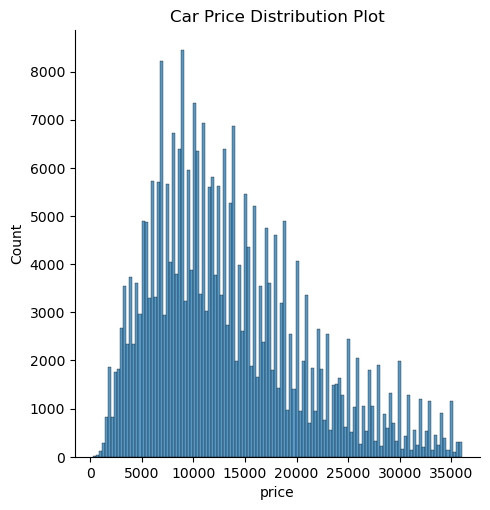

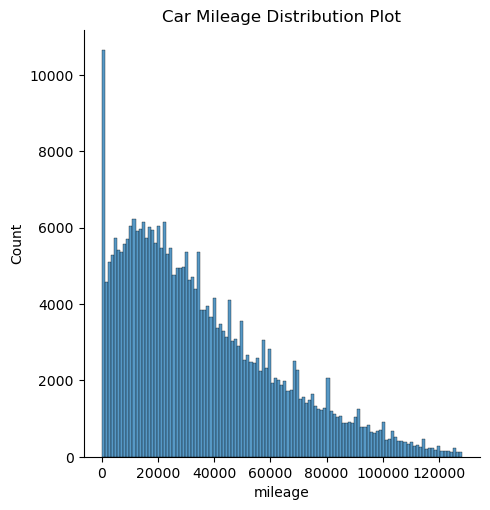

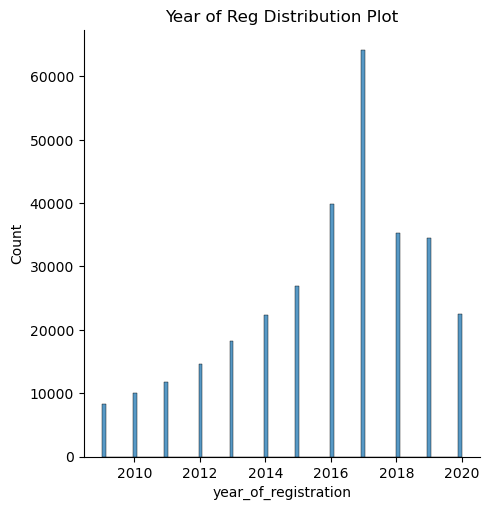

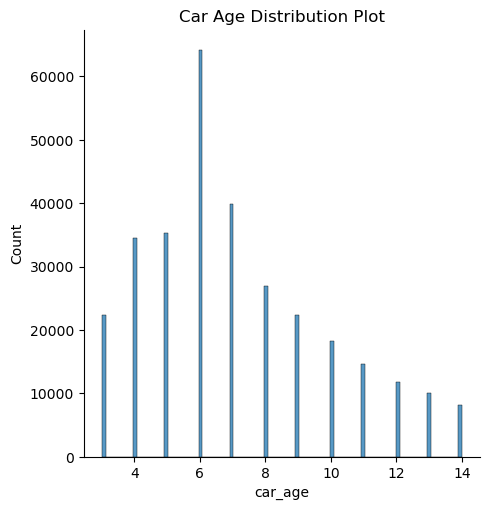

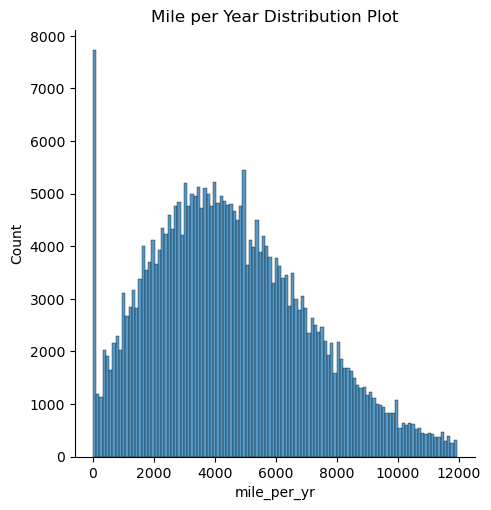

In [29]:
# Exploring the probability Distribution Functions after handling outliers

plt.figure(figsize=(10,5))

plt.subplot=(1,3,1)
sns.displot(df['price'])
plt.title(f"Car Price Distribution Plot")
plt.show()

plt.subplot=(1,3,2)
sns.displot(df['mileage'])
plt.title(f"Car Mileage Distribution Plot")
plt.show()

plt.subplot=(1,3,3)
sns.displot(df['year_of_registration'])
plt.title(f"Year of Reg Distribution Plot")
plt.show()

plt.subplot=(2,3,1)
sns.displot(df['car_age'])
plt.title(f"Car Age Distribution Plot")
plt.show()

plt.subplot=(1,3,2)
sns.displot(df['mile_per_yr'])
plt.title(f"Mile per Year Distribution Plot")
plt.show()

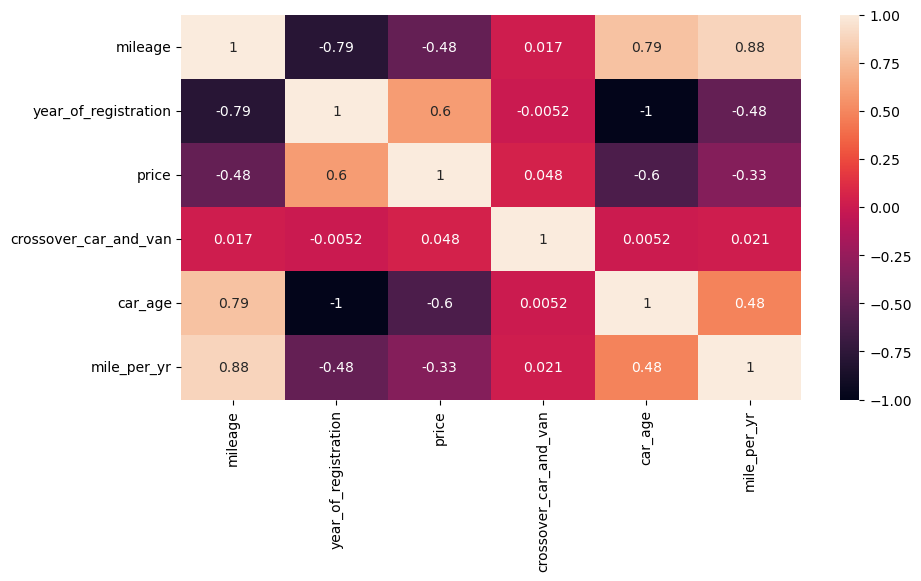

In [30]:
## Visualizing the correlation after removing outliers
plt.rcParams['figure.figsize'] = (10,5)

corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)
plt.show()

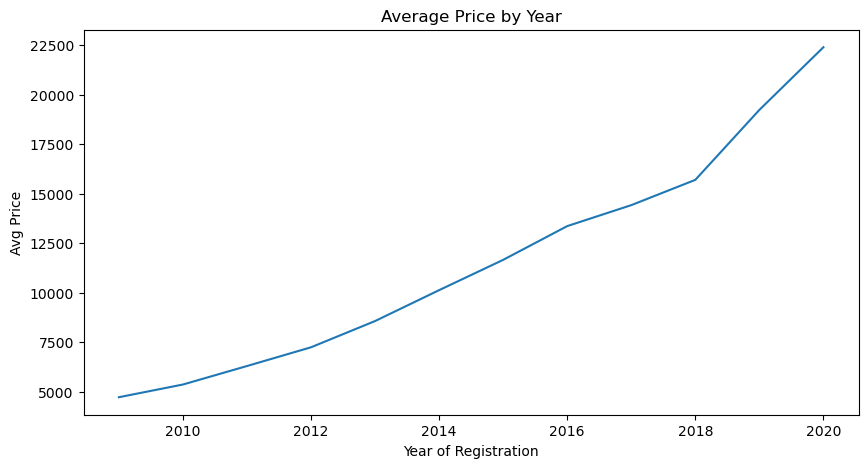

In [31]:
df.groupby('year_of_registration')['price'].mean().plot()
plt.title("Average Price by Year")
plt.xlabel('Year of Registration')
plt.ylabel('Avg Price')
plt.show()

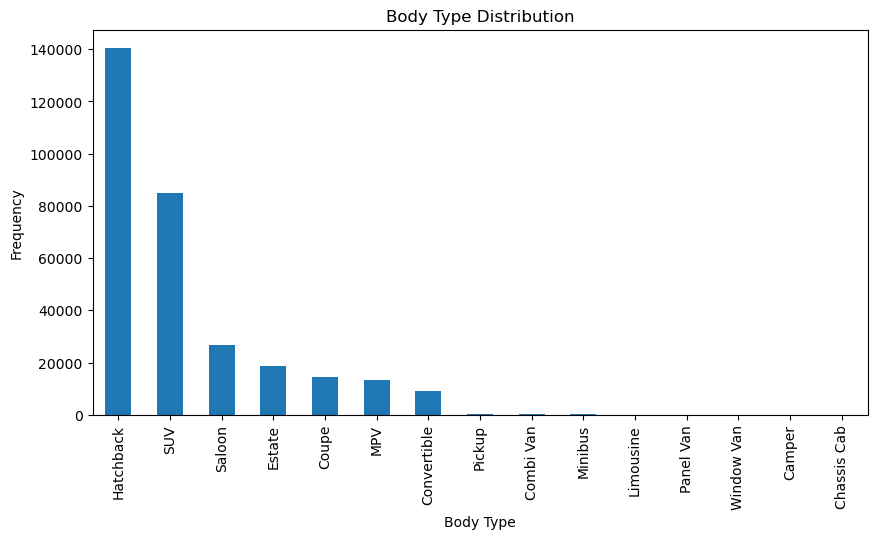

In [32]:
df['body_type'].value_counts().plot(kind='bar')
plt.title("Body Type Distribution")
plt.xlabel('Body Type')
plt.ylabel('Frequency')
plt.show()

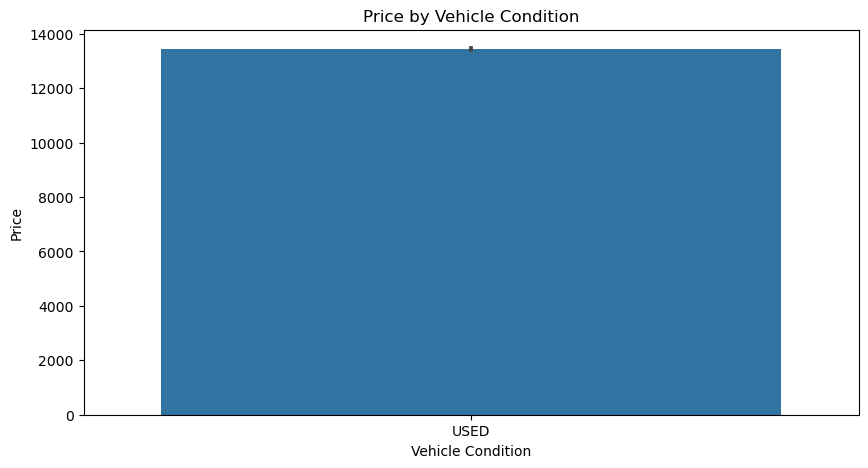

In [33]:
sns.barplot(x='vehicle_condition', y='price', data=df)
plt.title("Price by Vehicle Condition")
plt.xlabel('Vehicle Condition')
plt.ylabel('Price')
plt.show()

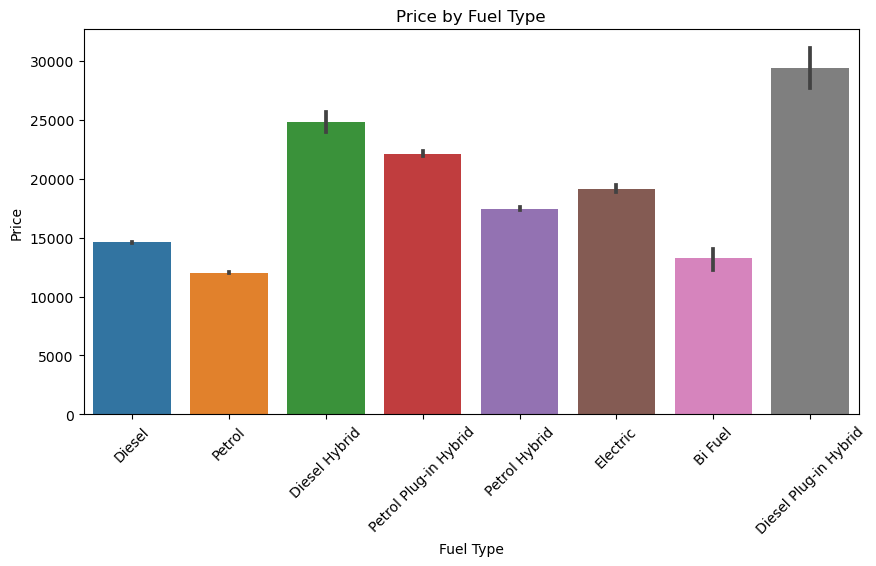

In [34]:
sns.barplot(x='fuel_type', y='price', data=df)
plt.title("Price by Fuel Type")
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

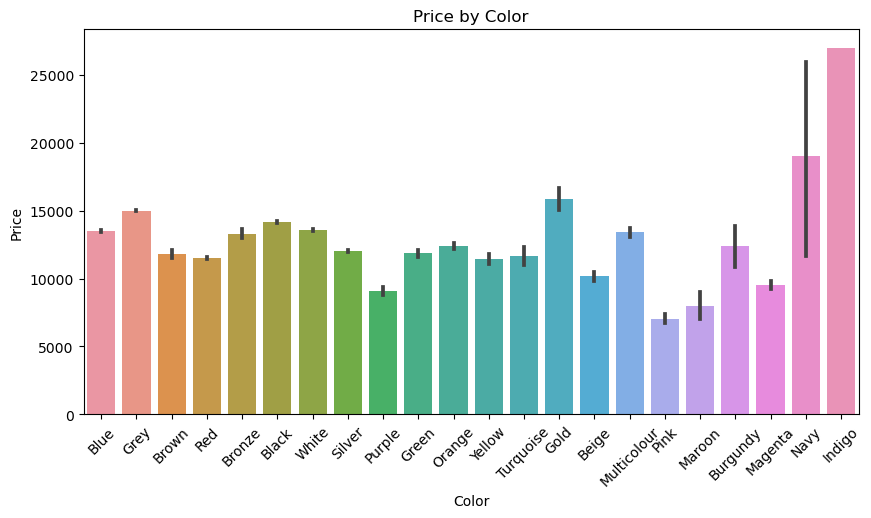

In [35]:
sns.barplot(x='standard_colour', y='price', data=df)
plt.title("Price by Color")
plt.xlabel('Color')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

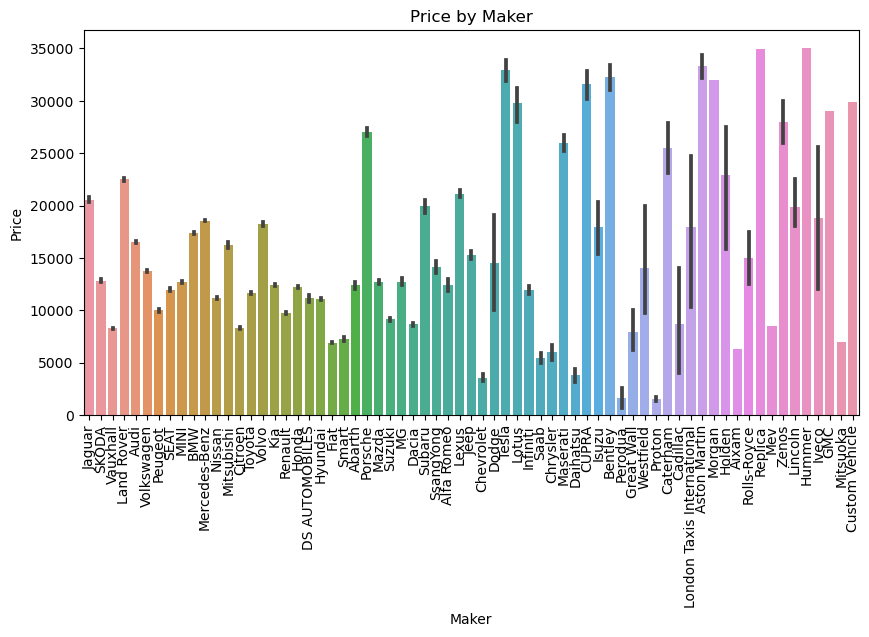

In [36]:
sns.barplot(x='standard_make', y='price', data=df)
plt.title("Price by Maker")
plt.xlabel('Maker')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

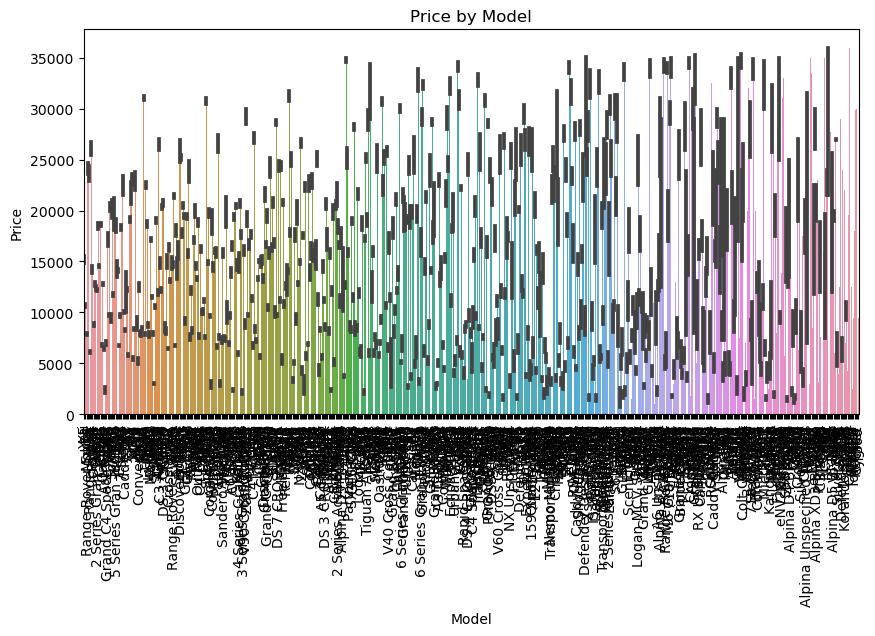

In [37]:
sns.barplot(x='standard_model', y='price', data=df)
plt.title("Price by Model")
plt.xlabel('Model')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

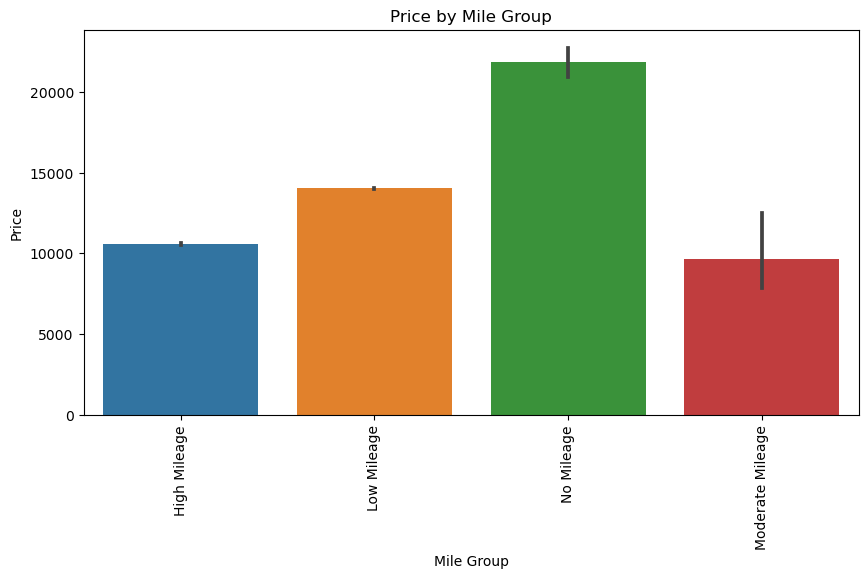

In [39]:
sns.barplot(x='mile_yr_group', y='price', data=df)
plt.title("Price by Mile Group")
plt.xlabel('Mile Group')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()